
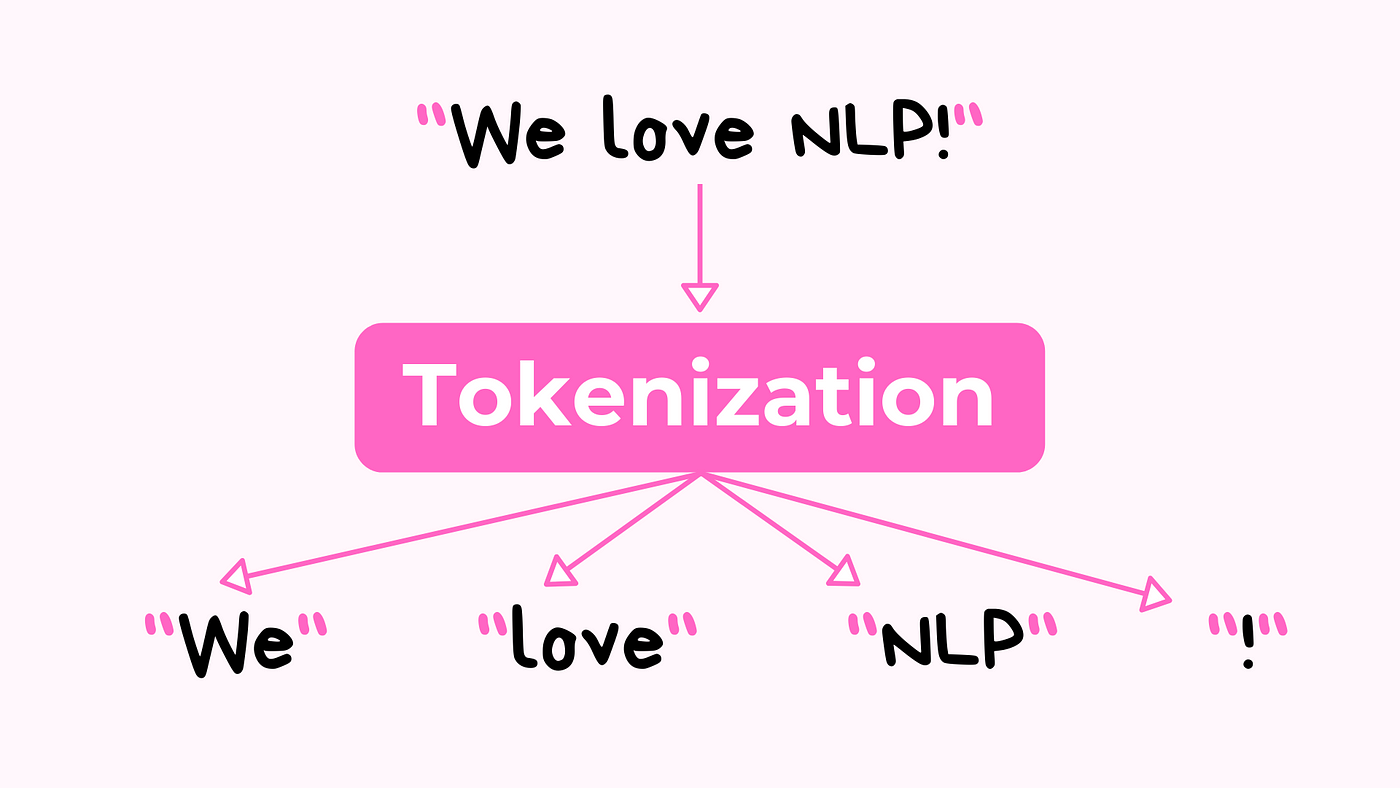
[ref](https://medium.com/@zakhtar2020/nlp-preprocessing-tokenization-44ef71eead10)

###**What is Tokenization?**

Tokenization is the process of breaking down a piece of text, like a sentence or a paragraph, into individual words or “tokens.” These tokens are the basic building blocks of language, and tokenization helps computers understand and process human language by splitting it into manageable units.

### **Why Do We Need Tokenization?**

1. **Foundation of NLP Pipeline**:
   - First step in any NLP pipeline, significantly influencing subsequent stages.

2. **Transforms Unstructured Data**:
   - Converts unstructured text into manageable chunks of information.

3. **Enables Numerical Representation**:
   - Transforms text documents into numerical data structures for machine learning.

4. **Facilitates Direct Actions**:
   - Allows computers to trigger actions and responses from tokenized text.

5. **Features in Machine Learning**:
   - Serves as features in machine learning models, driving complex decisions.

6. **Improves Efficiency and Accuracy**:
   - Simplifies text representation and increases processing efficiency.
   - Provides structured input, enhancing the accuracy of text analysis.




Hence, Tokenization is the foremost step while modeling text data. Tokenization is performed on the corpus to obtain tokens. The tokens are then used to prepare a vocabulary. **Vocabulary refers to the set of unique tokens in the corpus.**

## Types of Tokenizations


*   Whitespace Tokenization
*   Word Tokenization
*   Character Tokenization
*   Subword Tokenizations
 *   Byte-Pair Tokenization
 *   Wordpiece Tokenization
 *   Unigram Tokenization


NLTK (Natural Language Toolkit),spaCy,Hugging Face Tokenizers, Sentencepiece, Tiktoken








In [ ]:
# Install necessary libraries
!pip install nltk

In [ ]:
# Import necessary libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Whitespace Tokenization
The simplest way to tokenize text is to use whitespace within a string as the “delimiter” of words.

In [ ]:
# Whitespace Tokenization
text = "Hello world! Welcome to the NLP workshop."
tokens = text.split()
print("Whitespace Tokenization:", tokens)

Whitespace Tokenization: ['Hello', 'world!', 'Welcome', 'to', 'the', 'NLP', 'workshop.']


 Limitations of Whitespace Tokenization:
- Inefficient for languages without explicit word boundaries (e.g., Chinese, Japanese)
- Does not handle punctuation well
- Fails to capture meaningful units in complex text

### Word Tokenization
Word Tokenization is the most commonly used tokenization algorithm. It splits a piece of text into individual words based on a certain delimiter.

In [ ]:
# Word Tokenization using NLTK
tokens = word_tokenize(text)
print("Word Tokenization using NLTK:", tokens)

Word Tokenization using NLTK: ['Hello', 'world', '!', 'Welcome', 'to', 'the', 'NLP', 'workshop', '.']


Limitations:
- May struggle with out-of-vocabulary words
- Not suitable for languages with complex morphology
- Requires language-specific rules to handle edge cases properly

### Character Tokenization
Character Tokenization splits apiece of text into a set of characters. It overcomes the drawbacks we saw above about Word Tokenization.

Character Tokenizers handles OOV words coherently by preserving the information of the word. It breaks down the OOV word into characters and represents the word in terms of these characters
It also limits the size of the vocabulary. Want to talk a guess on the size of the vocabulary?

~26 since the vocabulary contains a unique set of characters

In [ ]:
# Character Tokenization
chars = list(text)
print("Character Tokenization:", chars)

Character Tokenization: ['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', '!', ' ', 'W', 'e', 'l', 'c', 'o', 'm', 'e', ' ', 't', 'o', ' ', 't', 'h', 'e', ' ', 'N', 'L', 'P', ' ', 'w', 'o', 'r', 'k', 's', 'h', 'o', 'p', '.']


Limitations:
- Produces longer sequences, increasing computational complexity
- May lose semantic meaning by breaking up words into individual characters
- Less efficient for tasks requiring understanding of word-level context

### Advanced Tokenization Techniques
While basic word and character level tokenization are common, there are several advanced tokenization algorithms and methods designed to handle the complexities of natural language

* Subword Tokenization (splits the piece of text into subwords):
  *   Byte-Pair Tokenization
  *   Wordpiece Tokenization
  *   Unigram Tokenization

**Byte-Pair Tokenization** BPE is a word segmentation algorithm that merges the most frequently occurring character or character sequences iteratively.

An extension of the original BPE, Byte-Level BPE operates on a byte-level rather than character-level. It encodes each token as a sequence of bytes rather than characters.
Byte-Level BPE is used by models like GPT-2 for text generation.

**WordPiece** is the tokenization algorithm Google developed to pretrain BERT. It has since been reused in quite a few Transformer models based on BERT, such as DistilBERT, MobileBERT, Funnel Transformers, and MPNET. It’s very similar to BPE in terms of the training, but the actual tokenization is done differently.

Like BPE, WordPiece starts from a small vocabulary including the special tokens used by the model and the initial alphabet. Since it identifies subwords by adding a prefix (like ## for BERT), each word is initially split by adding that prefix to all the characters inside the word. So, for instance, "word" gets split like this: w ##o ##r ##d

Then, again like BPE, WordPiece learns merge rules. The main difference is the way the pair to be merged is selected. Instead of selecting the most frequent pair, WordPiece computes a score for each pair, using the following formula:

*score=(freq_of_pair)/(freq_of_first_element×freq_of_second_element)*

**Unigram Algorithm** is often used in SentencePiece, which is the tokenization algorithm used by models like AlBERT, T5, mBART, Big Bird, and XLNet.
The Unigram language model treats each token independently, without considering its context within the sequence of tokens.

**Imagine** starting with a large vocabulary containing various tokens.
Through iterative steps, tokens that contribute the least to the model's loss are gradually removed until the vocabulary size matches a predefined target.
This method ensures that the final vocabulary is optimized for efficient text processing tasks while maintaining the ability to tokenize any word in the original corpus.

In [ ]:
## Training SOTA tokenizer models using HuggingFace `tokenizers` package
!pip install tokenizers

In [ ]:
## importing the tokenizer and subword BPE trainer
from tokenizers import Tokenizer
from tokenizers.models import BPE, Unigram, WordLevel, WordPiece
from tokenizers.trainers import BpeTrainer, WordLevelTrainer, \
                                WordPieceTrainer, UnigramTrainer
from tokenizers.pre_tokenizers import Whitespace

#### Download the data to train the model.

In [ ]:
!wget http://www.gutenberg.org/cache/epub/16457/pg16457.txt

In [ ]:
!wget https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip
!unzip wikitext-103-raw-v1.zip

#### Functions to prepare and train the tokenizers using Hugging Face library

In [ ]:
## Setting Up Special Tokens and Tokenizer Preparation

#First, let's define special tokens and functions to prepare and train our custom tokenizer.
unk_token = "<UNK>"  # token for unknown words
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>"]  # special tokens

def prepare_tokenizer_trainer(alg):
    """
    Prepares the tokenizer and trainer with unknown & special tokens.
    """
    if alg == 'BPE':
        tokenizer = Tokenizer(BPE(unk_token=unk_token))
        trainer = BpeTrainer(special_tokens=spl_tokens)
    elif alg == 'UNI':
        tokenizer = Tokenizer(Unigram())
        trainer = UnigramTrainer(unk_token=unk_token, special_tokens=spl_tokens)
    elif alg == 'WPC':
        tokenizer = Tokenizer(WordPiece(unk_token=unk_token))
        trainer = WordPieceTrainer(special_tokens=spl_tokens)
    else:
        tokenizer = Tokenizer(WordLevel(unk_token=unk_token))
        trainer = WordLevelTrainer(special_tokens=spl_tokens)

    tokenizer.pre_tokenizer = Whitespace()
    return tokenizer, trainer

def train_tokenizer(files, alg='WLV'):
    """
    Takes the files and trains the tokenizer.
    """
    tokenizer, trainer = prepare_tokenizer_trainer(alg)
    tokenizer.train(files, trainer) # training the tokenzier
    tokenizer.save("./tokenizer-trained.json")
    tokenizer = Tokenizer.from_file("./tokenizer-trained.json")
    return tokenizer

def tokenize(input_string, tokenizer):
    """
    Tokenizes the input string using the tokenizer provided.
    """
    output = tokenizer.encode(input_string)
    return output

## Training each model on the small as well as the large dataset

In [ ]:
##training on a small dataset
small_file = ['pg16457.txt']
large_files = [f"./wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]

#tokens_dict: An empty dictionary initialized to store token outputs for different tokenization algorithms.
tokens_dict = {}

#The outer loop iterates over two lists: small_file and large_files.
#For each iteration, it prints a message indicating which files' vocabulary is being used
for files in [small_file, large_files]:
    print(f"========Using vocabulary from {files}=======")
    for alg in [ 'BPE', 'UNI', 'WPC']:

        trained_tokenizer = train_tokenizer(files, alg)
        input_string = "This is a deep learning tokenization tutorial. Tokenization is the first step in a deep learning NLP pipeline. We will be comparing the tokens generated by each tokenization model. Excited much?!😍"
        output = tokenize(input_string, trained_tokenizer)
        tokens_dict[alg] = output.tokens
        print("----", alg, "----")
        print(output.tokens, "->", len(output.tokens))

## Comparing the BPE and Unigram tokens

In [ ]:
import pandas as pd

max_len = max(len(tokens_dict['UNI']), len(tokens_dict['WPC']), len(tokens_dict['BPE']))
diff_bpe = max_len - len(tokens_dict['BPE'])
diff_wpc = max_len - len(tokens_dict['WPC'])

tokens_dict['BPE'] = tokens_dict['BPE'] + ['<PAD>']*diff_bpe
tokens_dict['WPC'] = tokens_dict['WPC'] + ['<PAD>']*diff_wpc


df = pd.DataFrame(tokens_dict)

In [ ]:
df.describe(include= 'all')

References

https://www.freecodecamp.org/news/train-algorithms-from-scratch-with-hugging-face/

https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

https://neptune.ai/blog/tokenization-in-nlp#:~:text=Why%20do%20we%20need%20tokenization,be%20considered%20as%20discrete%20elements.
https://medium.com/@zakhtar2020/nlp-preprocessing-tokenization-44ef71eead10
https://medium.com/@zakhtar2020/nlp-preprocessing-tokenization-44ef71eead10
https://www.datacamp.com/blog/what-is-tokenization
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
https://neptune.ai/blog/tokenization-in-nlp
https://docs.mistral.ai/guides/tokenization/